In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [436]:
file_path = r'..\data\01_Raw\01_DataCompetencySurvey.xlsx'
df = pd.read_excel(file_path, index_col=0)



pd.set_option('display.max_columns', 47)
print(df.head())
#print(df.info())
# print(df.describe())
#print(df.isnull().sum())
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

   Godzina rozpoczęcia  Godzina ukończenia Adres e-mail  Nazwa  \
ID                                                               
1  2024-03-05 15:25:52 2024-03-05 15:33:04    anonymous    NaN   
2  2024-03-05 15:29:46 2024-03-05 15:35:02    anonymous    NaN   
3  2024-03-05 15:16:30 2024-03-05 15:37:17    anonymous    NaN   
4  2024-03-05 15:34:17 2024-03-05 15:38:01    anonymous    NaN   
5  2024-03-05 15:34:26 2024-03-05 15:38:20    anonymous    NaN   

    Czas ostatniej modyfikacji  \
ID                               
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   
5                          NaN   

   Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.  \
ID                                                                                                       
1   Projekt "data" będący mobilną stacją benzynową...                                 

In [437]:
barColor = "#081D58"
backgroundColor = "#FFFFD9"

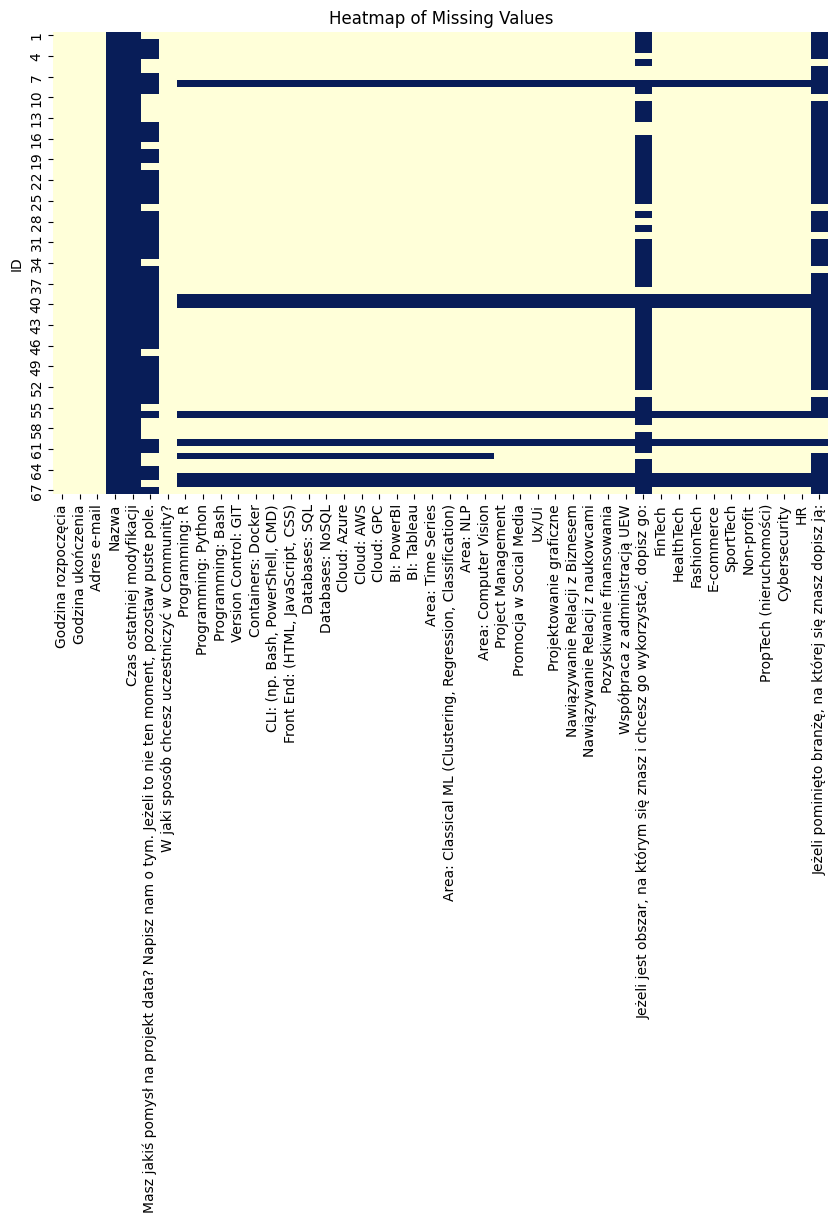

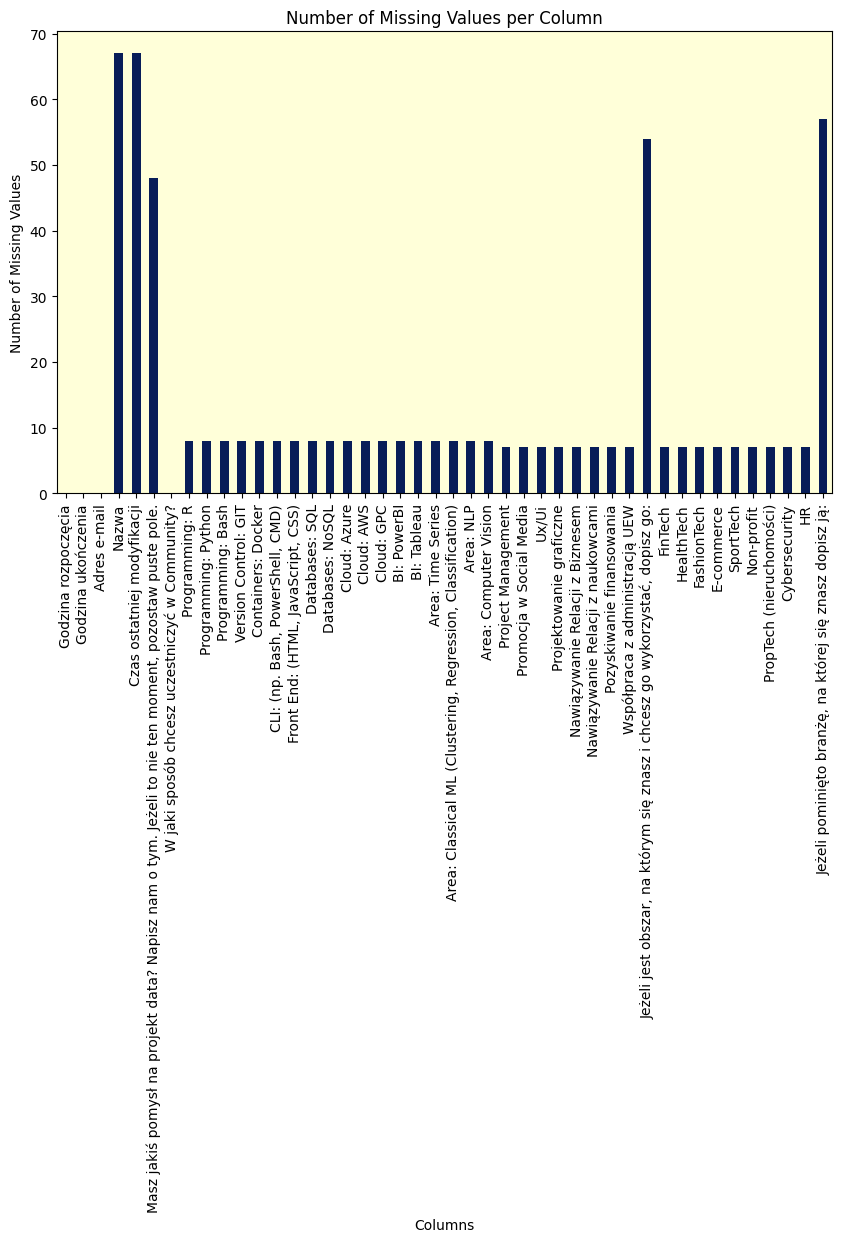

In [438]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Heatmap of Missing Values')
plt.show()

missing_values.plot(kind='bar', figsize=(10, 6), color=barColor).set_facecolor(backgroundColor)
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

In [439]:
df["Chcę uczystniczyć"] = np.where(df["W jaki sposób chcesz uczestniczyć w Community?"] == "Chcę uczestniczyć w projekcie data", 1, 0)
df["Chcę organizować"] = np.where(df["W jaki sposób chcesz uczestniczyć w Community?"] == "Chcę organizować \"życie\" Community", 1, 0)
df["Chcę konsumować"] =np.where(df["W jaki sposób chcesz uczestniczyć w Community?"] == "Póki co chcę czerpać, obserwować, \"konsumować content\"", 1, 0)
df["Chcę org. + ucz."] =np.where(df["W jaki sposób chcesz uczestniczyć w Community?"] == "Chcę uczestniczyć w projekcie data i organizować \"życie\" Community", 1, 0)

#df.loc[df["Chcę konsumować"] == 1, :] = df.loc[df["Chcę konsumować"] == 1, :].fillna("0") #make impact for corr visual

df = df.drop(columns=["W jaki sposób chcesz uczestniczyć w Community?",
                      "Godzina rozpoczęcia",
                      "Godzina ukończenia",
                      "Adres e-mail",
                      "Nazwa",
                      "Czas ostatniej modyfikacji"])

df = df.rename(columns = {"Front End: (HTML, JavaScript, CSS)": "Front End",
                            "CLI: (np. Bash, PowerShell, CMD)": "CLI",
                            "Area: Classical ML (Clustering, Regression, Classification)": "Area: Classical ML",
                            "Nawiązywanie Relacji z Biznesem": "Naw. Rel. z Biznesem",
                            "Nawiązywanie Relacji z naukowcami": "Naw. Rel. z  naukowcami",
                            "Współpraca z administracją UEW": "Wsp. z administracją UEW",
                            "Masz jakiś pomysł na projekt data? Napisz nam o tym. Jeżeli to nie ten moment, pozostaw puste pole.": "Twój pomysł",
                            "Jeżeli jest obszar, na którym się znasz i chcesz go wykorzystać, dopisz go:": "Zainteresowania",
                            "Jeżeli pominięto branżę, na której się znasz dopisz ją:": "Dodatkowe Branży"})


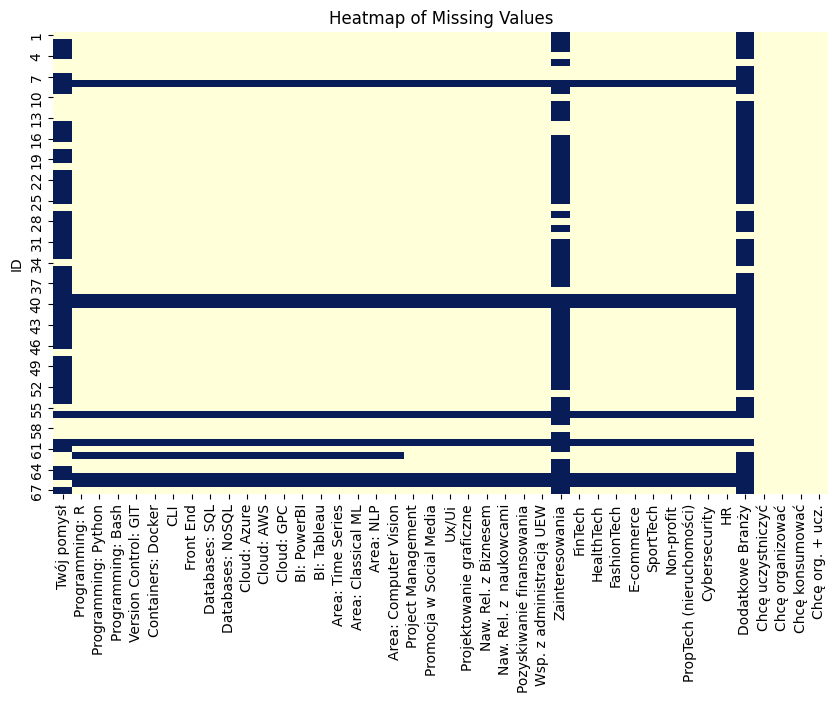

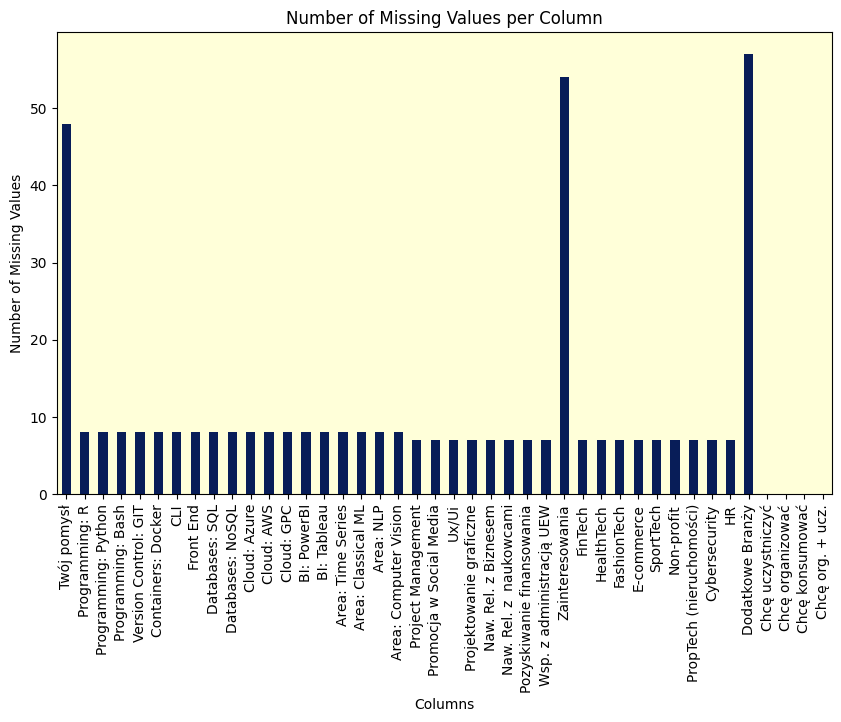

In [440]:

missing_values = df.isnull().sum()

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title('Heatmap of Missing Values')
plt.show()

missing_values.plot(kind='bar', figsize=(10, 6), color=barColor).set_facecolor(backgroundColor)
plt.title('Number of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

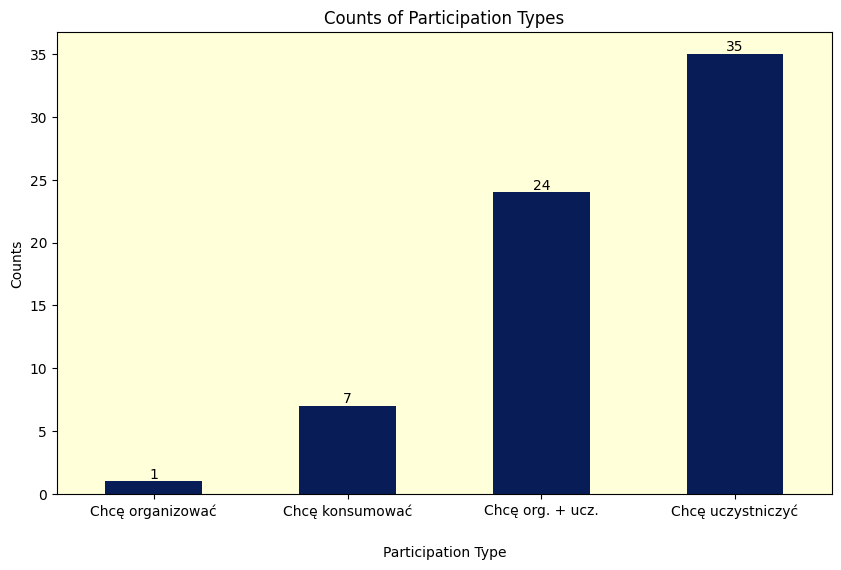

In [441]:
counts = df[["Chcę uczystniczyć",
              "Chcę organizować",
                "Chcę konsumować",
                  "Chcę org. + ucz."]
                  ].sum().sort_values()
counts.plot(kind='bar', figsize=(10, 6), color=barColor).set_facecolor(backgroundColor)
plt.title('Counts of Participation Types')
plt.xlabel('Participation Type', labelpad=20)
plt.ylabel('Counts')
plt.xticks(rotation=0)

for index, value in enumerate(counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

C:\Users\aleks\AppData\Local\Temp\ipykernel_8256\2169042377.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  classified_matrix = corr_matrix.applymap(classify_correlation)


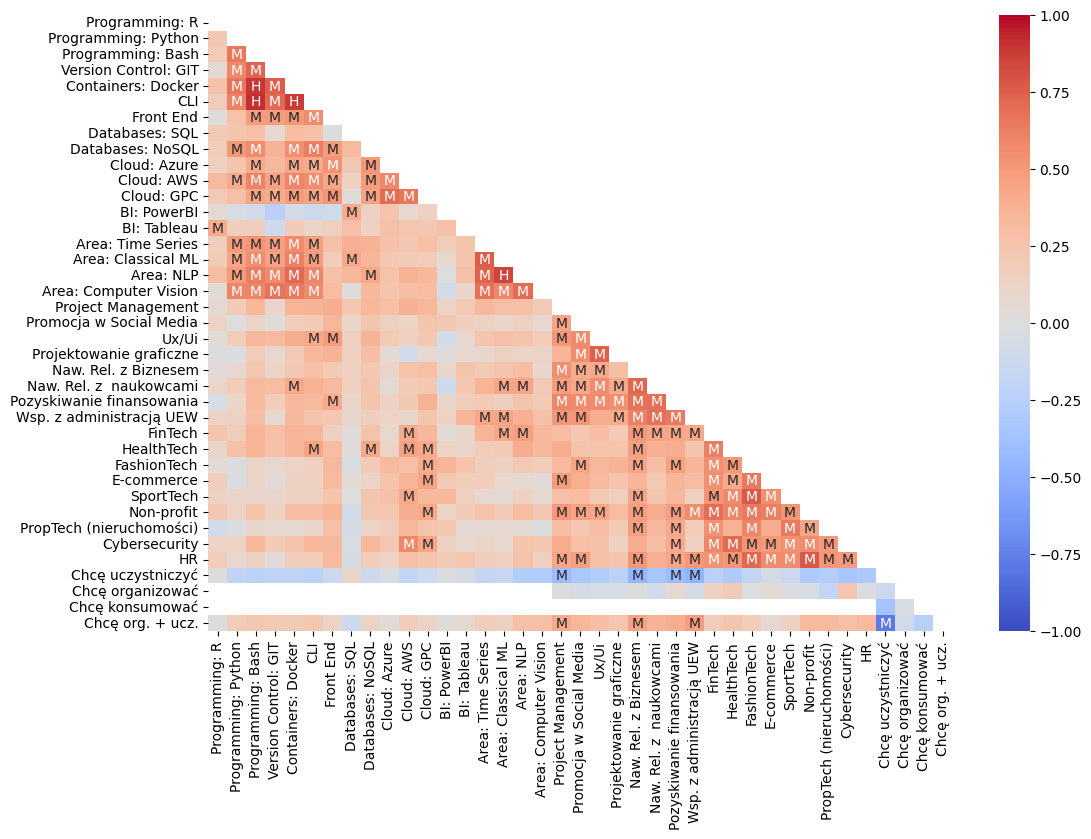

In [442]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()
#Absolute value higher than 0.7 is high correlated value | between 0.3 and 0.7 is medium correlated | less than 0.3 is low correlated
def classify_correlation(corr_value):
    if abs(corr_value) >= 0.8: 
        return 'H'
    elif abs(corr_value) >= 0.4:
        return 'M'
    else:
        return ''

classified_matrix = corr_matrix.applymap(classify_correlation)

plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=classified_matrix,fmt='', cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.show()

C:\Users\aleks\AppData\Local\Temp\ipykernel_8256\2167868779.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


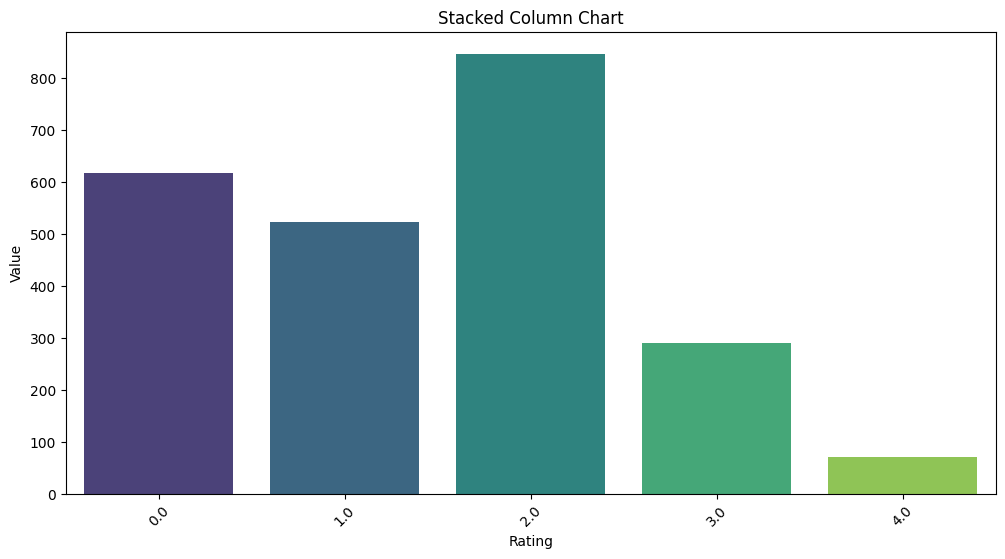

In [453]:
max_columns = 10

# Filter out columns with too many unique values
filtered_columns = [col for col in numeric_df.columns if numeric_df[col].nunique() <= max_columns]

# Create a new DataFrame with only the filtered columns
numeric_df_filtered = numeric_df[filtered_columns]

plt.figure(figsize=(12, 6))

# Count occurrences of each unique value in the DataFrame
value_counts = numeric_df_filtered.stack().value_counts()

# Plot the bar chart
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Stacked Column Chart')
plt.xlabel('Rating')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

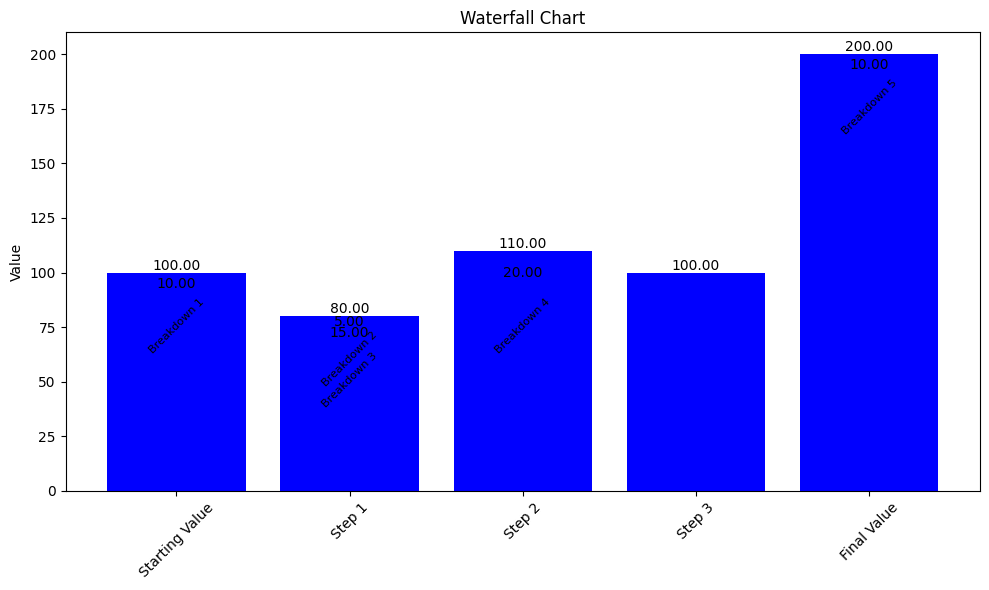